In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("../input/the-boston-houseprice-data/boston.csv")

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(506, 14)

In [10]:
from tensorflow import keras

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
y=data["MEDV"]

In [14]:
x=data.drop("MEDV",axis=1)

In [15]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [16]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=1/3)
#x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 1/3, random_state = 0), test_size = 1/3, random_state = 0)

In [18]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
118,0.13058,0.0,10.01,0,0.5470,5.872,73.1,2.4775,6,432.0,17.8,338.63,15.37
310,2.63548,0.0,9.90,0,0.5440,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64
282,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216.0,14.9,377.07,3.01
448,9.32909,0.0,18.10,0,0.7130,6.185,98.7,2.2616,24,666.0,20.2,396.90,18.13
99,0.06860,0.0,2.89,0,0.4450,7.416,62.5,3.4952,2,276.0,18.0,396.90,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.22876,0.0,8.56,0,0.5200,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63
164,2.24236,0.0,19.58,0,0.6050,5.854,91.8,2.4220,5,403.0,14.7,395.11,11.64
466,3.77498,0.0,18.10,0,0.6550,5.952,84.7,2.8715,24,666.0,20.2,22.01,17.15
189,0.08370,45.0,3.44,0,0.4370,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39


In [19]:
print(x_train.shape)
print(y_train.shape)

(337, 13)
(337,)


In [20]:
print(x_test.shape,y_test.shape)

(169, 13) (169,)


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
k=StandardScaler()

In [23]:
#fit only the x_train and test them both on the basis of the x_train

In [24]:
k.fit(x_train)

StandardScaler()

In [25]:
x_train=k.transform(x_train)
x_test=k.transform(x_test)

In [26]:
k1=StandardScaler()

In [27]:
y=np.array(y)
y=pd.DataFrame(y)

In [28]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [29]:
k1.fit(y_train)

StandardScaler()

In [30]:
y_train=k1.transform(y_train)
y_test=k1.transform(y_test)

In [31]:
x_train

array([[-0.37897574, -0.48928992, -0.13599334, ..., -0.25778346,
        -0.25935161,  0.40820216],
       [-0.08123815, -0.48928992, -0.15207447, ...,  0.02351074,
        -0.12214525,  0.02288033],
       [-0.38721169,  0.34286099, -1.11255646, ..., -1.61737209,
         0.18685924, -1.33633186],
       ...,
       [ 0.05420517, -0.48928992,  1.04670061, ...,  0.86739334,
        -3.93467102,  0.65943765],
       [-0.38454799,  1.38304962, -1.09647533, ..., -1.47672499,
         0.41704553, -1.00041026],
       [ 0.82181875, -0.48928992,  1.04670061, ...,  0.86739334,
         0.21738823,  0.78364395]])

In [32]:
y_train.shape

(337, 1)

In [33]:
x_train.shape

(337, 13)

In [34]:
def baseline_model():
    model=Sequential()
    model.add(Dense(16,input_dim=13,activation="relu"))
    model.add(Dense(16,activation="relu"))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(1))
    opt=Adam(learning_rate=0.001)
    model.compile(opt,loss="mean_squared_error")
    return model

In [35]:
model=baseline_model()

2022-09-27 09:29:33.425678: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [36]:
hist=model.fit(x_train,y_train,verbose=1,epochs=100,batch_size=16,validation_data=(x_test,y_test))

2022-09-27 09:29:33.651583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 1.1739 - val_loss: 0.9974
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9840 - val_loss: 0.9097
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8998 - val_loss: 0.8295
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8224 - val_loss: 0.7309
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7123 - val_loss: 0.6017
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.4833
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4881 - val_loss: 0.4088
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4183 - val_loss: 0.3566
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3617 - val_loss: 0.3156
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3189 - val_loss: 0.2820
Epoch 11

In [37]:
from sklearn.metrics import r2_score

In [38]:
yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

In [39]:
r2_score(y_train,yp_train)

0.9429768471248136

In [40]:
r2_score(y_test,yp_test)

0.8957457336235888

In [41]:
import matplotlib.pyplot as plt

In [42]:
hist.history["loss"]   #this show the loss in when the epochs are running

[1.1739394664764404,
 0.9839947819709778,
 0.8998247385025024,
 0.822371780872345,
 0.7122770547866821,
 0.5906826257705688,
 0.48809027671813965,
 0.4182698428630829,
 0.3617027699947357,
 0.31886374950408936,
 0.2857808768749237,
 0.2657815217971802,
 0.246648371219635,
 0.2395453006029129,
 0.22509709000587463,
 0.21566401422023773,
 0.2077556997537613,
 0.20081791281700134,
 0.19961883127689362,
 0.18934302031993866,
 0.17885471880435944,
 0.17472876608371735,
 0.17055194079875946,
 0.1666141301393509,
 0.1622590720653534,
 0.15894228219985962,
 0.1564675122499466,
 0.1528579741716385,
 0.15068094432353973,
 0.14799855649471283,
 0.14629417657852173,
 0.1463271528482437,
 0.1407444328069687,
 0.13899925351142883,
 0.1372915804386139,
 0.14330701529979706,
 0.1342993825674057,
 0.1383049041032791,
 0.13611161708831787,
 0.12919588387012482,
 0.12550045549869537,
 0.12313149124383926,
 0.12403549253940582,
 0.11941991001367569,
 0.11747591197490692,
 0.11652117222547531,
 0.114887788

In [43]:
hist.history["val_loss"]   #this show the validation loss of the data when the epochs are running

[0.9973819255828857,
 0.9097098708152771,
 0.8295258283615112,
 0.7309434413909912,
 0.6016789674758911,
 0.48326224088668823,
 0.40880340337753296,
 0.35659533739089966,
 0.31562402844429016,
 0.2819744646549225,
 0.2635054588317871,
 0.24496783316135406,
 0.23569445312023163,
 0.2276117503643036,
 0.2172980159521103,
 0.21465973556041718,
 0.20648881793022156,
 0.2000749409198761,
 0.1968870908021927,
 0.19290819764137268,
 0.18504813313484192,
 0.18210136890411377,
 0.17522616684436798,
 0.1741182506084442,
 0.17287199199199677,
 0.17276960611343384,
 0.17131398618221283,
 0.16824309527873993,
 0.1654975414276123,
 0.16205330193042755,
 0.16100992262363434,
 0.16162508726119995,
 0.16038045287132263,
 0.15783219039440155,
 0.15602873265743256,
 0.15291425585746765,
 0.15029367804527283,
 0.16124023497104645,
 0.15277089178562164,
 0.1486489623785019,
 0.149319589138031,
 0.14516445994377136,
 0.14800694584846497,
 0.14722837507724762,
 0.14534232020378113,
 0.144529789686203,
 0.143

In [44]:
type(hist.history["loss"])

list

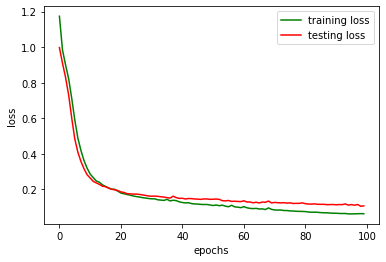

In [45]:
plt.plot(hist.history["loss"],color="green",label="training loss")
plt.plot(hist.history["val_loss"],color="red",label="testing loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()